# Estatística & Probabilidade - 2024/01

## Projeto 02 - Cadeias de Markov

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `654q7wf`

### Milton Salgado Leandro

#### DRE: 122169279

### Pedro Henrique Honorio Saito

#### DRE: 122149392

# ⚠️ INSTRUÇÕES ⚠️ LEIAM ATENTAMENTE! ⚠️

### Instruções para Entrega do Projeto

A data limite de entrega do projeto é segunda-feira, 23/06/2024, às 23h59. Avaliações entregues após esse prazo serão desconsideradas.

- A entrega deve ser feita exclusivamente através do Google Classroom, e o projeto deve ser redigido na forma de um relatório incluindo os códigos. Para isso, use a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:

  - Dentro da turma no Google Classroom, clique em "Atividades".

  - No tema "Projetos", clique em "Projeto 02" e em seguida em "Ver atividade".

  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione "Arquivo" ou "Google Drive", se optar por fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.

  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 02".

  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).

  - Na tela a seguir, clique em "Entregar" para confirmar a entrega do trabalho.

  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.

  - As explicações que você precisar fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.

  - Caso seja necessário, equações podem ser introduzidas em LaTeX nas células de texto.

  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada.

- A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada aluno(a) ou dupla deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

- Todos os passos de sua resolução devem ser devidamente justificados.

- Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

***

# Projeto 2

## Enunciado

### Questão 1: Modelando "Banco Imobiliário" com Cadeia de Markov

O objetivo do projeto é modelar uma ultra-simplificação do jogo "Banco Imobiliário" através de uma cadeia de Markov. Considere as seguintes regras:

- O tabuleiro consiste em 20 casas, dispostas circularmente, enumeradas de 0 até 19. Após a casa 19, retorna-se à casa 0.

- O jogador começa na casa de número 0, e o número de casas que ele irá andar, sempre no sentido crescente, é a soma do resultado obtido em dois lançamentos de um dado honesto de 6 faces.

- A casa de número 10 é uma casa especial, denominada “prisão”. Caso o jogador caia nessa casa através da rolagem de dados, o jogo segue normalmente (chamamos esse caso de “visita à prisão”). Porém, o jogador pode ir preso se, a qualquer momento do jogo, nas rolagens dos dados ele obtiver uma sequência de três lançamentos com valores repetidos (chamemos esse caso de “ir preso”). Exemplos:

  - Se o jogador está na casa de número 5 e obtém 2 + 3 na rolagem dos dados, ele irá somente visitar a prisão e seguirá jogando normalmente.

  - Se o jogador está na casa de número 7, e obtém 4 + 4 na rolagem dos dados, ele deve lançá-los novamente. Caso obtenha valores distintos na nova rolagem, por exemplo, 4 + 6, ele irá para a casa de número 17 e o jogo segue normalmente. Mas caso obtenha valores iguais na nova rolagem, por exemplo, 5 + 5, uma nova rolagem deve ser feita. Se nessa nova rolagem valores distintos forem observados, segue o jogo, mas se valores iguais forem observados uma terceira vez, o jogador irá automaticamente para a prisão.

- O jogador fica no máximo três rodadas na prisão, mas pode sair antes se obtiver valores repetidos no lançamento dos dados. Por exemplo:

  - Imediatamente ao ir preso, o jogador lança o par de dados. Se ele obtiver valores iguais, por exemplo, 2 + 2, ele está imediatamente solto e lança o par de dados novamente para saber para qual casa ele irá, partindo da casa 10. Se ele obtiver valores diferentes, por exemplo, 2 + 5, ele lança novamente o par de dados: obtendo valores iguais está solto e obtendo valores diferentes continua preso. Neste último caso, ele passa mais uma rodada na prisão e em seguida é automaticamente solto, seguindo o jogo normalmente.

- O jogador fica caminhando no tabuleiro indefinidamente de acordo com tais regras.

Com base nisso, faça o que se pede abaixo:

(a) Explique como o cenário acima descrito pode ser modelado por uma cadeia de Markov, descrevendo detalhadamente os estados de sua cadeia e exibindo a sua matriz de probabilidades de transição. Cada passo de sua construção deve ser descrito de forma detalhada.

### Resolução

Primeiramente, antes de iniciar a modelagem, vamos definir quais estados do "jogo imobiliário" serão representados na modelagem da cadeia de Markov. Desse modo, temos os seguintes estados possíveis:

- **Estado "não-suspeito"**: O jogador, até o momento, não realizou uma jogada em que ambos os lançamentos de dados foram iguais.

- **Estado "suspeito 1"**: O jogador lançou uma par de dados com faces iguais. Nada além disso.

- **Estado "suspeito 2"**: O jogador realizou dois lançamentos, não necessariamente consecutivos, em que caíram faces iguais dos dados.

- **Estado "prisioneiro"**: O jogador realizou três lançamentos de dados com faces iguais.

    - **Preso recém**: O jogador lançou novamente o par de dados, uma rodada após ser preso, e obteve dados iguais, sendo solto.

    - **Preso em liberdade condicional**: O jogador ficou preso por 2 rodadas e, na terceira, realizou um lançamento com dados iguais, sendo solto. 

    - **Preso com prisão perpétua**: O jogador ficou preso por 3 rodadas, sendo solto automaticamente na quarta rodada.

Nesse sentido, nossa matriz precisará comportar os estados possíveis do jogador. Desse modo, vamos segmentá-la da seguinte forma:

- Linhas: Indicam o estado do usuário, bem como sua casa atual no tabuleiro.

    - Primeiras 20 linhas $(0 \to 19)$: Jogador se encontra no estado não suspeito.

    - Linhas $(20 \to 39)$: Jogador está no estágio 1 de suspeito.
    
    - Linhas $(40 \to 59)$: Jogador está no estágio 2 de suspeito.
    
    - Linhas $(60 \to 62)$: Jogador está preso, sendo que cada linha representa um dos estados possíveis de prisão.
    
- Colunas: Indicam a probabilidade do jogador migrar para uma dada casa, considerando sua posição inicial.
    
    - Primeiras 20 colunas com $i \in [0, 19]$: Probabilidade do jogador ir para a casa $i$, dada sua posição inicial e o estado de não suspeito.
    
    - Próximas 20 colunas $(20 \to 39)$: Probabilidade do jogador passar para o estágio 1 de suspeito.
    
    - Próximas 20 colunas $(40 \to 59)$: Probabilidade do jogador passar para o estágio 2 de suspeito.
    
    - Próximas 3 colunas $(60 \to 62)$: Probabilidade do jogador passar para um dos estados de prisão.

Feito isso tudo, podemos modelar a matriz da cadeia de Markov considerando então que a matriz nas primeiras 20 linhas e primeiras 20 colunas se repetirá um total de três vezes ao longo da matriz total $60\times 60$.

Por fim, devemos nos atentar nas últimas 23 linhas da matriz de probabilidade, uma vez que desejamos embutir a lógica da prisão nesses casos. Portanto, fizemos da seguinte forma:

- As 20 últimas linhas antes da linha 60 possuem na coluna 60 a transição para o estado recém-preso, com probabilidade de 1/6, e para o estado não suspeito, com probabilidade de 5/6 nas 20 primeiras colunas como nas outras linhas (transição para não suspeito).

- A linha 60 indica a transição para o estado preso em liberdade condicional, com probabilidade de 5/6, e para o estado não suspeito após ser preso por 1 rodada, com probabilidade de 1/6.

- A linha 61 indica a transição para o estado preso com prisão perpétua, com probabilidade de 5/6, e para o estado não suspeito após ser preso por 2 rodadas, com probabilidade de 1/6.

- A linha 62 indica a transição para o estado não suspeito após ser preso por 3 rodadas, com probabilidade de 1.

In [1]:
import numpy as np

# Inicializando a matriz 63x63 com zeros
P = np.zeros((63, 63))

# Probabilidades da soma no lançamento de dois dados diferentes
probabilidades_diferentes = {
    3: 2/36,
    4: 2/36,
    5: 4/36,
    6: 4/36,
    7: 6/36,
    8: 4/36,
    9: 4/36,
    10: 2/36,
    11: 2/36
}

# Função para determinar a próxima casa após rolar dois dados
def next_house(i, roll):
    return (i + roll) % 20

# Primeiras 20 linhas (estados 0 a 19)
for i in range(20):
    for roll, prob in probabilidades_diferentes.items():
        P[i, next_house(i, roll)] += prob
    # Transição para o estágio 1 de suspeito
    P[i, i + 20] = 1/6

# Segundas 20 linhas (estados 20 a 39)
for i in range(20, 40):
    house = i - 20
    for roll, prob in probabilidades_diferentes.items():
        P[i, next_house(house, roll)] += prob
    # Transição para o estágio 2 de suspeito
    P[i, i + 20] = 1/6

# Terceiras 20 linhas (estados 40 a 59)
for i in range(40, 60):
    house = i - 40
    for roll, prob in probabilidades_diferentes.items():
        P[i, next_house(house, roll)] += prob
    # Transição para o estado recém-preso
    P[i, 60] = 1/6
    
P[60, 10] = 5/6 # Transição para o estado preso em liberdade condicional
P[60, 61] = 1/6 # Transição para o estado não suspeito após ser preso porm 1 rodada
P[61, 10] = 5/6 # Transição para o estado preso com prisão perpétua
P[61, 62] = 1/6 # Transição para o estado não suspeito após ser preso por 2 rodadas
P[62, 10] = 1 # Transição para o estado não suspeito  após ser preso por 3 rodadas
    
# Exibição da matriz
np.set_printoptions(precision=3, suppress=True)
print("Matriz de Probabilidades de Transição:")
print(P)
# Verificação da soma das probabilidades de transição
print("\nSoma das probabilidades de transição por linha:")
print(P.sum(axis=1))

Matriz de Probabilidades de Transição:
[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.167 0.   ]
 [0.    0.    0.    ... 0.    0.    0.167]
 [0.    0.    0.    ... 0.    0.    0.   ]]

Soma das probabilidades de transição por linha:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Como podemos notar também, a soma de cada uma das linhas da matriz de transição é 1, confirmando uma das propriedades fundamentais da cadeia de Markov, garantindo que o estágio transita para algum estágio válido dentro do espaço de estados.

***

b) Denote por $(X_t)_{t∈Z\geq0}$ a posição do jogador no tabuleiro ao longo do tempo. Pelo item a), sabemos que essa sequência de variáveis aleatórias é descrita por uma cadeia de Markov. Construa um algoritmo para simular observações de tal cadeia, onde é possível controlar o número de iterações desejadas.

### Resolução

Dada a variável aleatória $(X_t)\;\;\forall\;t\in Z\geq 0$, vamos realizar uma simulação da cadeia de Markov.

Teremos um estágio inicial para o jogador, denotado por `status_jogador`, para o qual iremos simular o lançamento dos dois dados e as possíveis posições ao longo do tempo.

Nesse sentido, vamos considerar o vetor `status_jogador` como sendo o conjunto abaixo:

- Casa atual do jogador no tabuleiro $(0 \to 19)$.

- Estágio de suspeito $(0 \to 2)$

- Rodada atual do jogador $(0 \to \infty)$

Nesse sentido, vamos simular o lançamento de um par de dados por meio da geração de um par de números "aleatórios" contidos no intervalo de $1$ a $6$ e incrementando os diferentes estágios e posições do jogador de acordo.

In [10]:
import random as rd

# Função que rola os dados de uma partida e retorna os 2 lançamentos.
def joga_dados():
    return rd.randint(1, 6), rd.randint(1, 6)

# Função para retornar o estado do jogador como string
def estado_suspeito(status_suspeito):
    estados = ["Normal", "Suspeito 1", "Suspeito 2", "Preso"]
    return estados[status_suspeito]

def jogo(n_repeticoes):
    """
    Função que administra o jogo Banco Imobiliário.
    Recebe como parâmetro um inteiro que representa quantas iterações o jogo terá.
    """
    status_jogador = [(0, "Normal", 0)]  # Posição inicial, estado inicial (Normal), e número da rodada inicial
    status_suspeito = 0
    rodada = 0
    rodada_primeira_prisao = None

    while n_repeticoes:
        dado1, dado2 = joga_dados()
        pos_atual, _, _ = status_jogador[-1]
        rodada += 1

        while dado1 == dado2:
            status_suspeito += 1
            if status_suspeito == 3:  # Preso após três lançamentos iguais consecutivos
                status_jogador.append((10, "Preso", rodada))
                if rodada_primeira_prisao is None:
                    rodada_primeira_prisao = rodada
                for _ in range(3):  # Três tentativas para sair da prisão
                    dado1, dado2 = joga_dados()
                    rodada += 1
                    if dado1 == dado2:  # Sai da prisão
                        pos_atual = 10
                        status_jogador.append(((pos_atual + dado1 + dado2) % 20, "Normal", rodada))
                        break
                    else:
                        status_jogador.append((10, "Preso", rodada))  # Continua na prisão
                status_suspeito = 0  # Reseta o status de suspeito após sair ou cumprir as rodadas na prisão
                break
            else:
                status_jogador.append((pos_atual, estado_suspeito(status_suspeito), rodada))
                dado1, dado2 = joga_dados()  # Rolar novamente os dados
        
        if status_suspeito < 3:
            status_jogador.append(((pos_atual + dado1 + dado2) % 20, "Normal", rodada))
            status_suspeito = 0  # Reseta o status de suspeito se não tirar números iguais

        n_repeticoes -= 1

    return status_jogador, rodada_primeira_prisao

n_repeticoes = 10000
resultados, _ = jogo(n_repeticoes)

print(f"Resultados:\n")
print(f"{resultados[:100]}")

Resultados:

[(0, 'Normal', 0), (9, 'Normal', 1), (16, 'Normal', 2), (7, 'Normal', 3), (7, 'Suspeito 1', 4), (13, 'Normal', 4), (19, 'Normal', 5), (5, 'Normal', 6), (8, 'Normal', 7), (19, 'Normal', 8), (8, 'Normal', 9), (8, 'Suspeito 1', 10), (14, 'Normal', 10), (2, 'Normal', 11), (13, 'Normal', 12), (0, 'Normal', 13), (0, 'Suspeito 1', 14), (7, 'Normal', 14), (15, 'Normal', 15), (15, 'Suspeito 1', 16), (0, 'Normal', 16), (6, 'Normal', 17), (12, 'Normal', 18), (18, 'Normal', 19), (7, 'Normal', 20), (16, 'Normal', 21), (16, 'Suspeito 1', 22), (0, 'Normal', 22), (9, 'Normal', 23), (9, 'Suspeito 1', 24), (9, 'Suspeito 2', 24), (10, 'Preso', 24), (10, 'Preso', 25), (10, 'Preso', 26), (10, 'Preso', 27), (17, 'Normal', 27), (3, 'Normal', 28), (11, 'Normal', 29), (17, 'Normal', 30), (5, 'Normal', 31), (10, 'Normal', 32), (13, 'Normal', 33), (3, 'Normal', 34), (14, 'Normal', 35), (3, 'Normal', 36), (10, 'Normal', 37), (15, 'Normal', 38), (2, 'Normal', 39), (13, 'Normal', 40), (1, 'Normal', 41)

***

c) Seja $Y$ a variável aleatória que representa a quantidade de passos que o jogador dá até a sua primeira prisão (tome cuidado, não é a primeira "visita à prisão"!). Obtenha uma aproximação para o valor esperado de $Y$, através de sucessivas simulações da cadeia usando o algoritmo construído no item b). Descreva detalhadamente o seu procedimento para realizar tal aproximação.

### Resolução



In [18]:
def media_primeira_prisao(n_experimentos, n_repeticoes):
    """
    Função que calcula a média da rodada da primeira prisão em múltiplos experimentos.
    """
    soma_rodadas_primeira_prisao = 0
    contador_rodadas_validas = 0

    for _ in range(n_experimentos):
        _, rodada_primeira_prisao = jogo(n_repeticoes)
        if rodada_primeira_prisao is not None:
            soma_rodadas_primeira_prisao += rodada_primeira_prisao
            contador_rodadas_validas += 1

    if contador_rodadas_validas == 0:
        return None  # Evita divisão por zero se nenhum experimento resultou em prisão

    return soma_rodadas_primeira_prisao / contador_rodadas_validas

n_experimentos = 10000
n_repeticoes = 10000
media_rodada_primeira_prisao = media_primeira_prisao(n_experimentos, n_repeticoes)
print(f"Média da rodada da primeira prisão: {media_rodada_primeira_prisao}")

Média da rodada da primeira prisão: 216.0881


O procedimento para obter uma aproximação do valor esperado de $Y$, que representa a quantidade de passos até a primeira prisão, foi realizado da seguinte forma:

A função `media_primeira_prisao(n_experimentos, n_repeticoes)` foi utilizada para calcular a média da rodada da primeira prisão em múltiplos experimentos.

Com múltiplos testes, nosso valor esperado de $Y$ tende a $216$, ficando sempre bem próximo desse valor.

O procedimento detalhado foi o seguinte:

1. **Definição dos Parâmetros**:
- `n_experimentos`: Número de experimentos a serem realizados para estimar a média da rodada da primeira prisão.
- `n_repeticoes`: Número de repetições em cada experimento para simular a cadeia de Markov.
- `media_primeira_prisao(n_experimentos, n_repeticoes)`: Função que calcula a média da rodada da primeira prisão em múltiplos experimentos.

2. **Simulação dos Experimentos**:
- Para cada experimento, a função `jogo(n_repeticoes)` é chamada para simular a cadeia de Markov e obter a rodada da primeira prisão.
- Se a rodada da primeira prisão for válida (diferente de `None`), a soma das rodadas é atualizada e o contador de rodadas válidas é incrementado.
- Caso contrário, o experimento é ignorado.

3. **Cálculo da Média da Primeira Prisão**
- Após todos os experimentos, a média das rodadas da primeira prisão é calculada dividindo a soma das rodadas válidas pelo número de rodadas válidas.

4. **Resultado**
- O valor médio da rodada da primeira prisão foi calculado e exibido como uma aproximação do valor esperado de $Y$, sendo aproximadamente 216.

d) Justifique matematicamente porque o procedimento realizado no item c) funciona para aproximar o valor esperado de $Y$.

### Justificativa Matemática para o Procedimento de Aproximação do Valor Esperado de $Y$

O procedimento realizado no item c) para estimar o valor esperado de $Y$, que representa a quantidade de passos até a primeira prisão, é fundamentado no conceito de média de amostras obtidas por simulações da cadeia de Markov. Conseguimos justificar matematicamente por que esse procedimento funciona para aproximar o valor esperado de $Y$, considerando o código utilizado para obter a quantidade de passos até a primeira prisão.

#### Definição de $Y$

- $Y$ é a variável aleatória que representa o número de passos até a primeira prisão na cadeia de Markov.

#### Esperança de $Y$

- A esperança de $Y$, denotada por $\mathbb{E}[Y]$, é o valor médio de $Y$ ao longo de múltiplas simulações da cadeia de Markov.

#### Simulações da Cadeia de Markov

O código realiza as seguintes etapas para simular a cadeia de Markov até a primeira prisão e calcular a média de passos:

1. **Função `jogo`**:
    - Esta função simula o jogo até o jogador ser preso pela primeira vez. 
    - O jogador começa na posição inicial com o estado "Normal".
    - A cada rodada, os dados são lançados e a posição e o estado do jogador são atualizados.
    - Se o jogador tira números iguais três vezes consecutivas, ele é preso e a função lida com as tentativas de sair da prisão.
    - A função retorna a lista de estados (`xt`) e a rodada da primeira prisão (`rodada_primeira_prisao`).

2. **Função `media_primeira_prisao`**:
    - Esta função realiza múltiplas simulações (denotadas por `n_experimentos`) do jogo.
    - Em cada simulação, ela chama a função `jogo` para obter a rodada da primeira prisão.
    - A função soma o total de rodadas da primeira prisão de todas as simulações e calcula a média das rodadas.

#### Lei dos Grandes Números

A Lei dos Grandes Números é um princípio fundamental na teoria das probabilidades, que pode ser enunciado da seguinte forma:

- Se realizarmos um grande número de simulações independentes de uma variável aleatória, a média dos resultados dessas simulações convergirá para o valor esperado da variável.

Aplicando isso ao nosso caso:

- As simulações realizadas pela função `media_primeira_prisao(n_experimentos, n_repeticoes)` são independentes e seguem a mesma distribuição.
- À medida que o número de simulações ($n_{simulacoes}$) aumenta, a média dos valores de rodadas até a primeira prisão obtidos nas simulações converge para $\mathbb{E}[Y]$.

#### Aplicação na Estimação de $\mathbb{E}[Y]$

- No procedimento descrito no item c), realizamos um número grande de simulações da cadeia de Markov (denotado por `n_experimentos`).
- Em cada simulação, calculamos a rodada até a primeira prisão e armazenamos esses valores.
- A média desses valores é então calculada para obter a estimativa do valor esperado de $Y$.

#### Convergência para $\mathbb{E}[Y]$

- Pela Lei dos Grandes Números, à medida que `n_experimentos` tende ao infinito, a média dos valores obtidos nas simulações converge para $\mathbb{E}[Y]$.
- Portanto, o procedimento de estimar $\mathbb{E}[Y]$ por simulações sucessivas da cadeia de Markov é válido e eficaz para aproximar o valor esperado de $Y$.

### Explicação da Lógica por Trás do Resultado da Média de 216 Rodadas Até o Jogador Ir Para a Prisão Pela Primeira Vez

Para entender a lógica por trás do resultado de 216 rodadas em média até que o jogador vá para a prisão pela primeira vez, precisamos considerar as regras do jogo e a forma como a cadeia de Markov foi modelada. Analisando de forma detalhada, obtivemos:

#### Regras do Jogo
1. Movimentação no Tabuleiro:
   - O jogador rola dois dados e move-se pela soma dos valores dos dados.
   - As probabilidades de rolar diferentes somas são baseadas nas combinações possíveis dos dois dados.

2. Estágio de Suspeito:
   - Se o jogador rolar números iguais (doubles), ele avança para o próximo estágio de suspeito.
   - Existem três estágios de suspeito: Normal, Suspeito 1, Suspeito 2.
   - Se o jogador rolar números iguais três vezes consecutivas, ele é preso.

3. Prisão:
   - Quando o jogador é preso, ele vai para a casa da prisão e permanece lá por três rodadas ou até rolar números iguais novamente.

#### Probabilidade de Ser Preso
Para ser preso, o jogador precisa rolar números iguais três vezes consecutivas. A probabilidade de prisão é dada por:

1. Probabilidade de Rolar Números Iguais (Doubles):
   - A probabilidade de rolar doubles em um lançamento de dois dados é $\frac{6}{36} = \frac{1}{6}$.

2. Probabilidade de Rolar "Doubles" Três Vezes Consecutivas:
   - A probabilidade de rolar doubles três vezes consecutivas é $\left(\frac{1}{6}\right)^3 = \frac{1}{216}$.

Isso significa que, em média, a cada 216 lançamentos de dados, o jogador deve esperar rolar "doubles" três vezes consecutivas uma vez e ser preso.

#### Cálculo da Média de Rodadas
Dado que a probabilidade de ser preso (rolar doubles três vezes consecutivas) é $\frac{1}{216}$, podemos esperar que o jogador será preso, em média, uma vez a cada 216 rodadas. Essa média é uma consequência direta da probabilidade cumulativa de eventos raros em uma cadeia de Markov.

1. Expectativa Matemática:
   - Em uma cadeia de Markov, se um evento tem uma probabilidade $p$ de ocorrer em cada rodada, o número esperado de rodadas até o evento ocorrer é $\frac{1}{p}$.
   - Aqui, $p = \frac{1}{216}$.
   - Portanto, o número esperado de rodadas até que o jogador vá para a prisão pela primeira vez é $\frac{1}{\frac{1}{216}} = 216$ rodadas.

#### Considerações Finais

1. Distribuição Geométrica:
   - Este resultado pode ser interpretado através da distribuição geométrica, onde o número de tentativas até o primeiro sucesso (prisão) é inversamente proporcional à probabilidade de sucesso em cada tentativa.

2. Validação por Simulação:
   - Este valor de 216 rodadas pode ser validado através de simulações, como fizemos anteriormente no código, onde várias simulações independentes foram realizadas para observar a média de rodadas até a primeira prisão.

### Conclusão

A média de 216 rodadas até que o jogador vá para a prisão pela primeira vez é derivada da baixa probabilidade de rolar doubles três vezes consecutivas. Esse resultado é consistente com a expectativa matemática para eventos raros em uma cadeia de Markov. A simulação confirma que, em um grande número de jogos, essa média se mantém estável, proporcionando uma visão estatisticamente sólida do comportamento esperado do jogador no jogo.

Finalmente, concluímos que o procedimento funciona porque as simulações repetidas da cadeia de Markov fornecem uma amostra dos valores possíveis de $Y$. Ao calcular a média desses valores, estamos usando a propriedade estatística de que a média amostral converge para a esperança da variável aleatória quando o número de observações (simulações) é grande o suficiente. Dessa forma, podemos confiar na estimativa obtida através das simulações para aproximar o valor esperado de $Y$.

e) Seja $Z$ a variável aleatória que representa a posição do jogador no tabuleiro após transcorrido um tempo suficientemente longo, ou seja, $X_t$ quando $t \to \infty$. Encontre a função massa de probabilidade de $Z$. Em média, em qual casa o jogador passa mais tempo? Discuta os resultados obtidos.

### Resolução

Primeiramente, a função massa de probabilidade (fmp) que desejamos obter corresponde à distribuição estacionária da cadeia de Markov que descreve o jogo. Portanto, essa distribuição nos dá informação com respeito à probabilidade do jogador estar em cada uma das casas após um número infinito de jogadas.

#### Cálculo da Distribuição Estacionária

A distribuição é calculada por meio da resolução do sistema $\pi P = \pi$. De modo que empregamos os autovalores e autovetores da matriz de transição para encontrar o vetor estacionário desejado.

Nesse sentido, a distribuição estacionária para as 20 casas é obtida por meio da soma da probabilidade dos estados correspondentes aos três estágios de suspeito. Então vamos enumerar o passo-a-passo:

1. Determinar os autovalores e autovetores da matriz de transição $P$.

2. Encontrar o autovetor associado ao autovalor $1$, em função da distribuição estacionária.

3. Normalizar o autovetor calculado acima e obter a sua primeira coluna.

4. Combinação das probabilidades entre cada um dos estágios possíveis do jogo, isto é, $(0 \to 19)$, $(20 \to 39)$, $(40 \to 59)$ e $(60 \to 62)$.

5. Encontrar o índice da casa com maior probabilidade $(\text{casa } 10)$ do jogador passar a maior quantidade de tempo.

6. Por fim, exibimos a casa onde o jogador passa mais tempo e sua probabilidade associada.

In [4]:
def gera_distribuicao_estacionaria():
    # Resolver o sistema πP = π
    valores, vetores = np.linalg.eig(P.T)
    vetor_estacionario = np.real(vetores[:, np.isclose(valores, 1)])
    vetor_estacionario = vetor_estacionario / vetor_estacionario.sum()
    vetor_estacionario = vetor_estacionario[:, 0]
    
    # Combinação das probabilidades entre cada um dos estágios possíveis do jogo
    distribuicao_estacionaria = vetor_estacionario[:20] + vetor_estacionario[20:40] + vetor_estacionario[40:60]
    distribuicao_estacionaria[10] += vetor_estacionario[60] + vetor_estacionario[61] + vetor_estacionario[62]
    
    return distribuicao_estacionaria

vetor_distribuicao_estacionaria = gera_distribuicao_estacionaria()

# Casa onde o jogador passa mais tempo
casa_mais_tempo = np.argmax(vetor_distribuicao_estacionaria)
tempo_medio = vetor_distribuicao_estacionaria[casa_mais_tempo]

print(f"Distribuição estacionária: {vetor_distribuicao_estacionaria}")
print(f"Soma da Função Massa de Probabilidade: {vetor_distribuicao_estacionaria.sum()}")
print(f"Casa onde o jogador passa mais tempo: {casa_mais_tempo} com probabilidade {tempo_medio:.4f}")

Distribuição estacionária: [0.05  0.05  0.049 0.049 0.05  0.05  0.049 0.049 0.049 0.049 0.059 0.049
 0.049 0.05  0.049 0.05  0.05  0.05  0.05  0.05 ]
Soma da Função Massa de Probabilidade: 0.9999999999999999
Casa onde o jogador passa mais tempo: 10 com probabilidade 0.0585


Podemos analisar o resultado da distribuição estacionária por meio da utilização de gráfico de barras da seguinte forma:

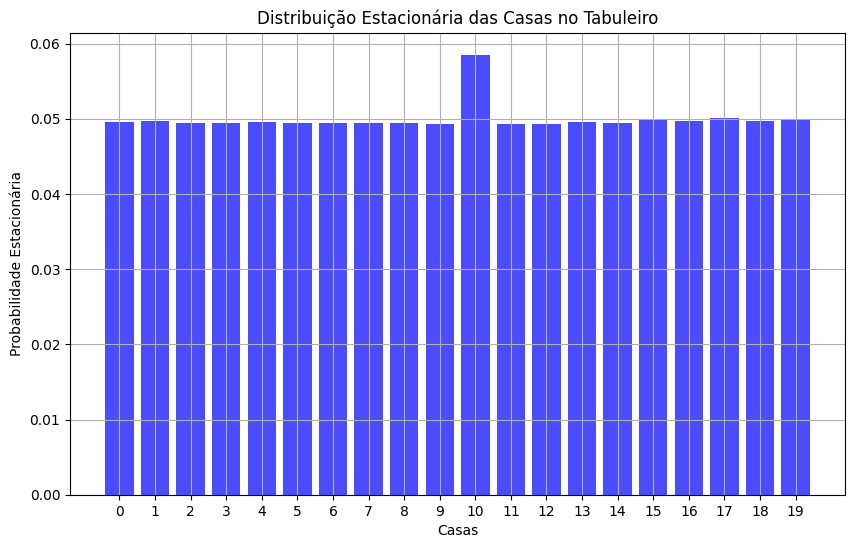

In [5]:
import matplotlib.pyplot as plt

# Plotar o gráfico da distribuição estacionária
plt.figure(figsize=(10, 6))
plt.bar(range(20), vetor_distribuicao_estacionaria, color='blue', alpha=0.7)
plt.xlabel('Casas')
plt.ylabel('Probabilidade Estacionária')
plt.title('Distribuição Estacionária das Casas no Tabuleiro')
plt.xticks(range(20))
plt.grid(True)
plt.show()